In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact
import ipywidgets as widgets

import seaborn as sns

import sklearn.datasets as data
import pandas as pd
%matplotlib inline
#sns.set_context('poster')
#sns.set_style('white')
#sns.set_color_codes()
#plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

## PART - 1

In [2]:
df=pd.read_csv("C:\\Users\\Manish\\Downloads\\insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df1=df.copy()
df1.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

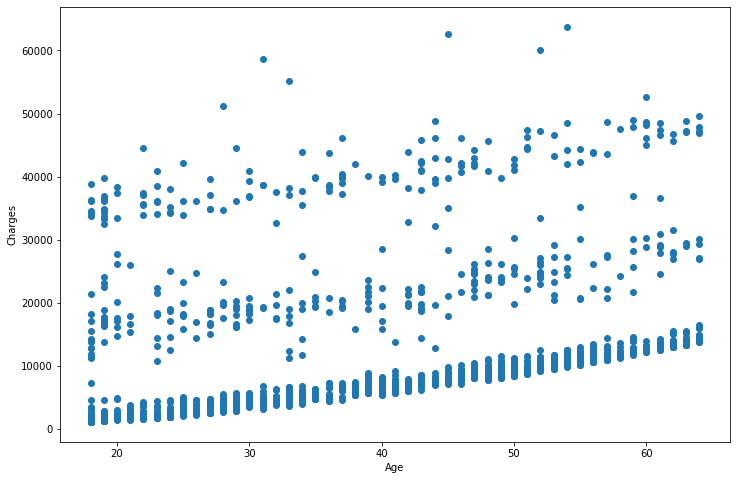

In [5]:
plt.figure(figsize=(12, 8))
plt.scatter (df1['age'],df1['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

## PART - 2

#### Exploratory Data Analysis (EDA)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df1['sex'] = df1['sex'].replace(['female'],0)
df1['sex'] = df1['sex'].replace(['male'],1)
df1.head()

age  sex     bmi  children smoker     region      charges
0   19    0  27.900         0    yes  southwest  16884.92400
1   18    1  33.770         1     no  southeast   1725.55230
2   28    1  33.000         3     no  southeast   4449.46200
3   33    1  22.705         0     no  northwest  21984.47061
4   32    1  28.880         0     no  northwest   3866.85520

In [8]:
df1['region'] = df1['region'].replace(['northeast'],1)
df1['region'] = df1['region'].replace(['northwest'],2)
df1['region'] = df1['region'].replace(['southeast'],3)
df1['region'] = df1['region'].replace(['southwest'],4)
df1.head()


age  sex     bmi  children smoker  region      charges
0   19    0  27.900         0    yes       4  16884.92400
1   18    1  33.770         1     no       3   1725.55230
2   28    1  33.000         3     no       3   4449.46200
3   33    1  22.705         0     no       2  21984.47061
4   32    1  28.880         0     no       2   3866.85520

In [9]:
df1['smoker'] = df1['smoker'].replace(['no'],0)
df1['smoker'] = df1['smoker'].replace(['yes'],1)
df1.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       4  16884.92400
1   18    1  33.770         1       0       3   1725.55230
2   28    1  33.000         3       0       3   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520

#### univariate analysis

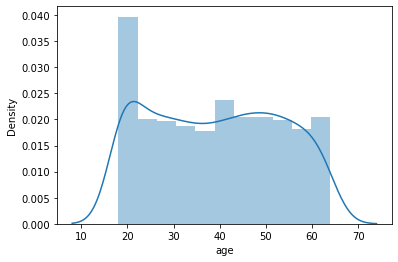

In [10]:
sns_plot = sns.distplot(df1["age"])

#### Bivariate Analysis

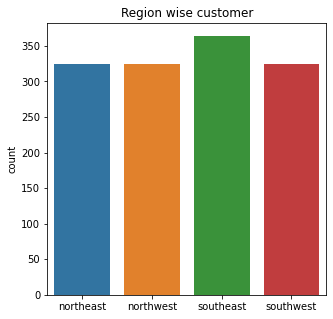

In [11]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df1.region.values, data=df1)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'northeast'
labels[1] = 'northwest'
labels[2] = 'southeast'
labels[3] = 'southwest'
ax.set_xticklabels(labels)
ax.set_title("Region wise customer")
plt.show()

#### plotting numeric variables

In [12]:
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

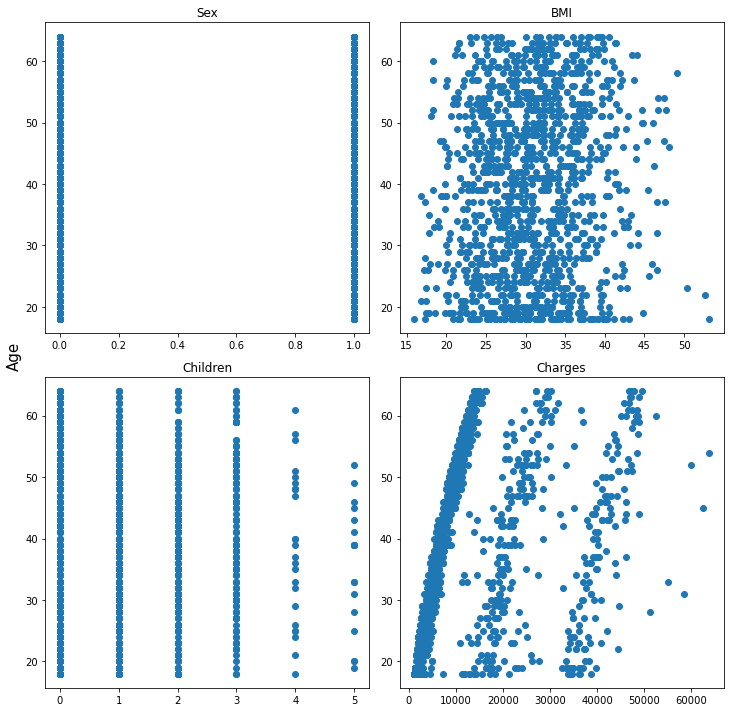

In [13]:
f,axarr = plt.subplots(2,2, figsize=(10,10))
age = df1.age.values
axarr[0,0].scatter(df1.sex.values, age)
axarr[0,0].set_title('Sex')

axarr[0,1].scatter(df1.bmi.values, age)
axarr[0,1].set_title('BMI')

axarr[1,0].scatter(df1.children.values, age)
axarr[1,0].set_title('Children')


axarr[1,1].scatter(df1.charges.values, age)
axarr[1,1].set_title('Charges')

f.text(-0.01, 0.5, 'Age', va='center', rotation='vertical', fontsize = 15)
plt.tight_layout()
plt.show()


#### Multi-variate Analysis

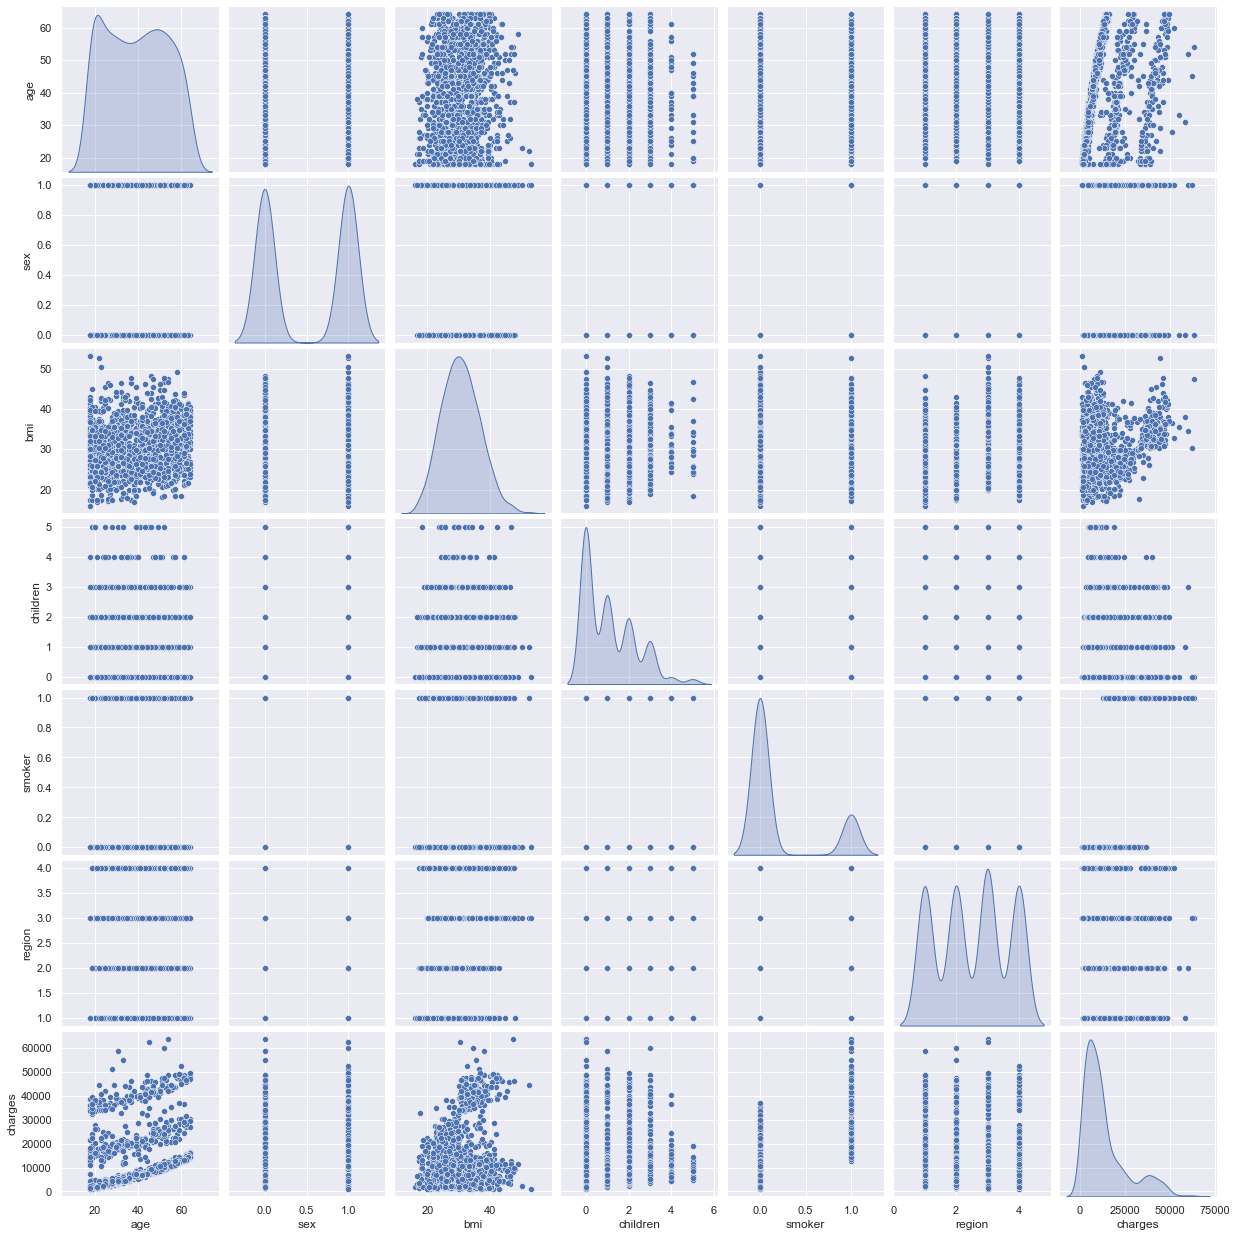

In [14]:
# to plot density curve instead of the histogram on the diagram # Kernel density estimation(kde)
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df1.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   


#### Distribution of numeric feature variable 

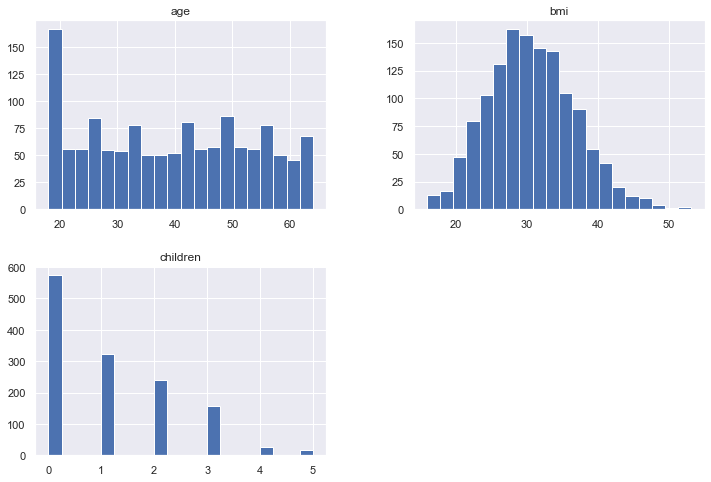

In [15]:
new_df=df[['age','bmi','children']]
new_df.hist(figsize=(12,8),bins=20)
plt.show()

In [16]:
corr=df1.corr()

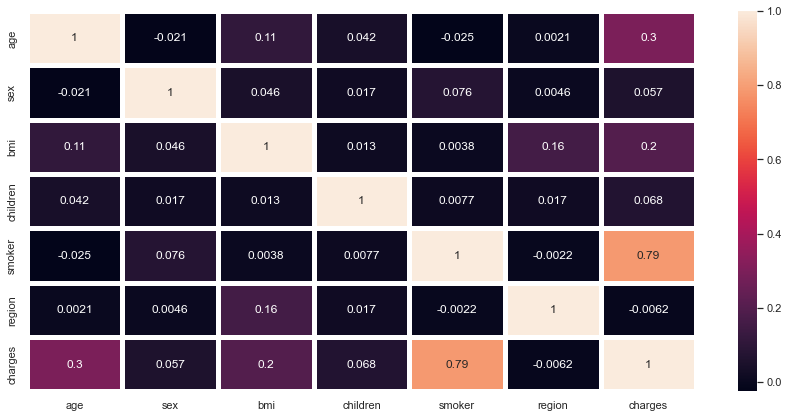

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(corr, annot = True,linewidth = 5)
plt.show()

1.Correlation between BMI and Charges is 0.2

2.Correlation between BMI and Age is 0.11

3.Correlation between Age and Charges is 0.3

#### Distribution of target(charges)

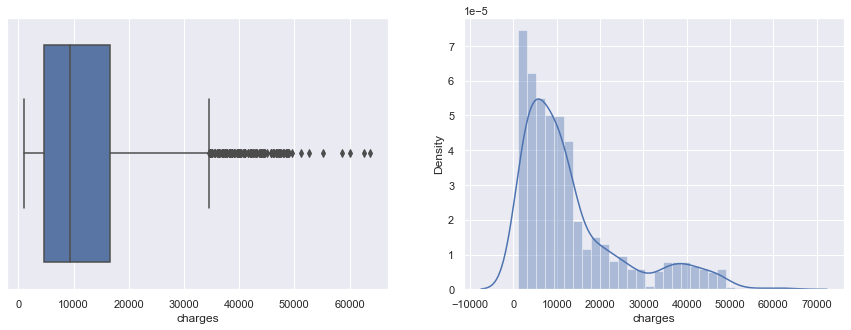

In [18]:
#4
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x= df1['charges'],ax=ax[0])
sns.distplot(df1['charges'],ax=ax[1])                
plt.show()

In [19]:
#5) a)

bins = [0, 18.5, 25, 30, 53.13]
slot = ['UNDER_WEIGHT', 'NORNMAL_WEIGHT', 'OVER_WEIGHT', 'OBESE']
df['bmi_slots'] = pd.cut(df['bmi'], bins = bins,labels = slot)
df.head()

age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

        bmi_slots  
0     OVER_WEIGHT  
1           OBESE  
2           OBESE  
3  NORNMAL_WEIGHT  
4     OVER_WEIGHT

In [20]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

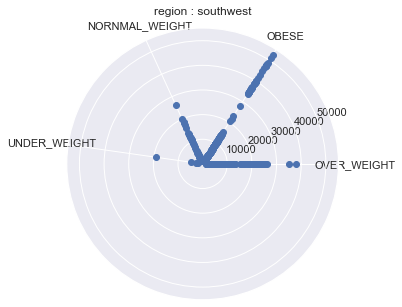

In [21]:
#5) b)

df_1 = df[(df.region == 'southwest')]
               
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(projection = 'polar')
ax.scatter(df_1['bmi_slots'], df_1['charges'])
plt.title('region : southwest');                     

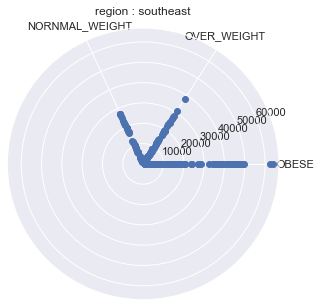

In [22]:
df_2 = df[(df.region == 'southeast')]
               
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(projection = 'polar')
ax.scatter(df_2['bmi_slots'], df_2['charges'])
plt.title('region : southeast');

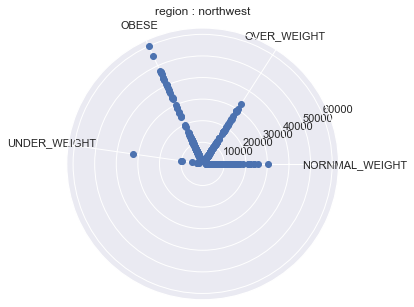

In [23]:
df_3 = df[(df.region == 'northwest')]
               
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(projection = 'polar')
ax.scatter(df_3['bmi_slots'], df_3['charges'])
plt.title('region : northwest');


Text(0.5, 1.0, 'region : northeast')

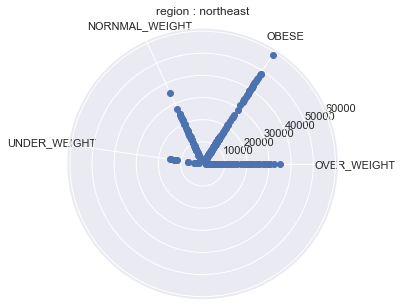

In [24]:
df_4 = df[(df.region == 'northeast')]
               
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(projection = 'polar')
ax.scatter(df_4['bmi_slots'], df_4['charges'])
plt.title('region : northeast')

#### Correlation matrix for non-categorical features

In [25]:
#6

feat_df=df[['age','bmi','children']]

In [26]:
corr1=feat_df.corr()

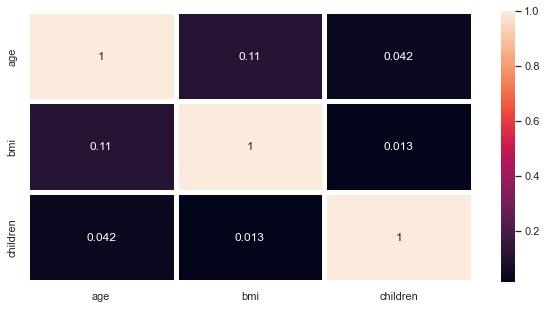

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr1, annot = True,linewidth = 5)
plt.show()

## TASK - 3 

#### Standard Scaler

In [28]:
std_scaler = StandardScaler()
scale_columns = ['age','sex','bmi','children','smoker','region','charges']
df1[scale_columns] = std_scaler.fit_transform(df1[scale_columns])
df1.head()

age       sex       bmi  children    smoker    region   charges
0 -1.438764 -1.010519 -0.453320 -0.908614  1.970587  1.343905  0.298584
1 -1.509965  0.989591  0.509621 -0.078767 -0.507463  0.438495 -0.953689
2 -0.797954  0.989591  0.383307  1.580926 -0.507463  0.438495 -0.728675
3 -0.441948  0.989591 -1.305531 -0.908614 -0.507463 -0.466915  0.719843
4 -0.513149  0.989591 -0.292556 -0.908614 -0.507463 -0.466915 -0.776802

#### MinMax Scaler

In [29]:
minmax=MinMaxScaler()
scale_columns = ['age','sex','bmi','children','smoker','region','charges']
df1[scale_columns]=minmax.fit_transform(df1[scale_columns])
df1.head()

age  sex       bmi  children  smoker    region   charges
0  0.021739  0.0  0.321227       0.0     1.0  1.000000  0.251611
1  0.000000  1.0  0.479150       0.2     0.0  0.666667  0.009636
2  0.217391  1.0  0.458434       0.6     0.0  0.666667  0.053115
3  0.326087  1.0  0.181464       0.0     0.0  0.333333  0.333010
4  0.304348  1.0  0.347592       0.0     0.0  0.333333  0.043816

#### Dropping categorial features

In [30]:
df2=df1.drop(['sex','smoker','region'],axis=1)

In [31]:
df2.head()

age       bmi  children   charges
0  0.021739  0.321227       0.0  0.251611
1  0.000000  0.479150       0.2  0.009636
2  0.217391  0.458434       0.6  0.053115
3  0.326087  0.181464       0.0  0.333010
4  0.304348  0.347592       0.0  0.043816

#### Elbow method

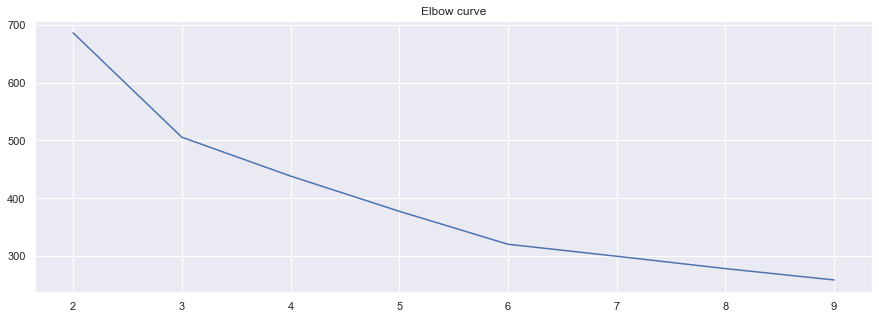

In [32]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

#### Silhouete Score

For n_clusters = 2 The average silhouette_score is : 0.33060986157786154
For n_clusters = 3 The average silhouette_score is : 0.3706225668276283
For n_clusters = 4 The average silhouette_score is : 0.4038067198621495
For n_clusters = 5 The average silhouette_score is : 0.34608113719153055
For n_clusters = 6 The average silhouette_score is : 0.32273376621327177


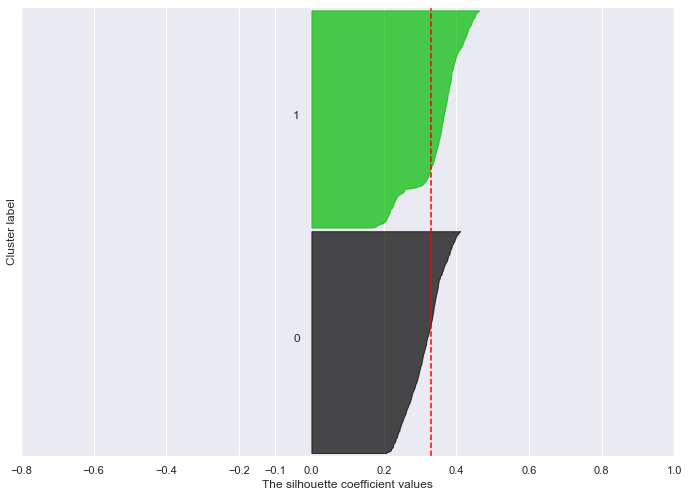

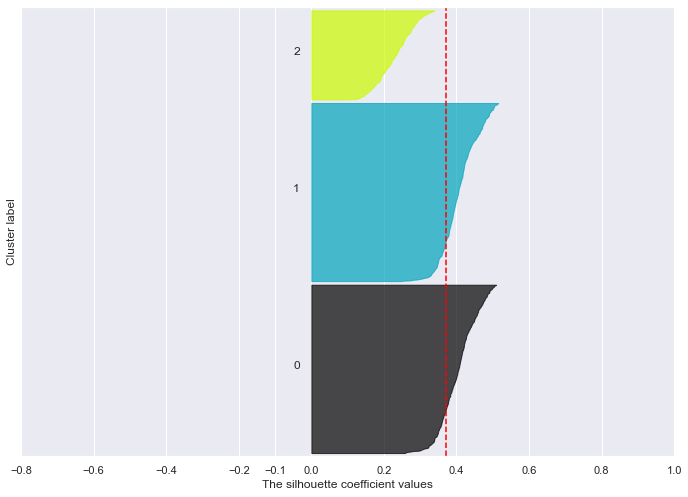

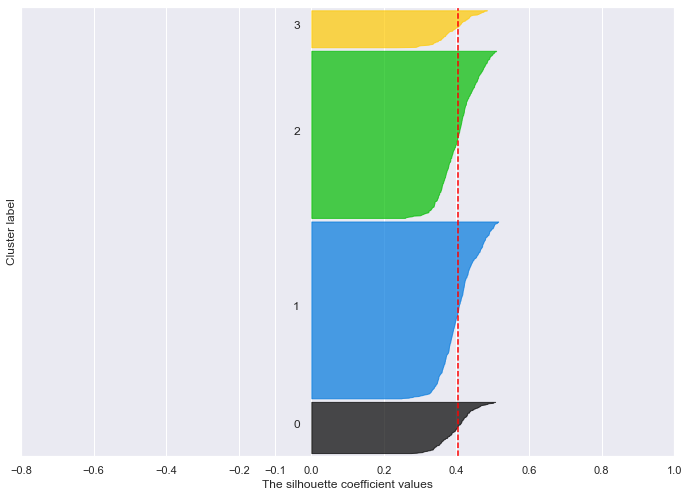

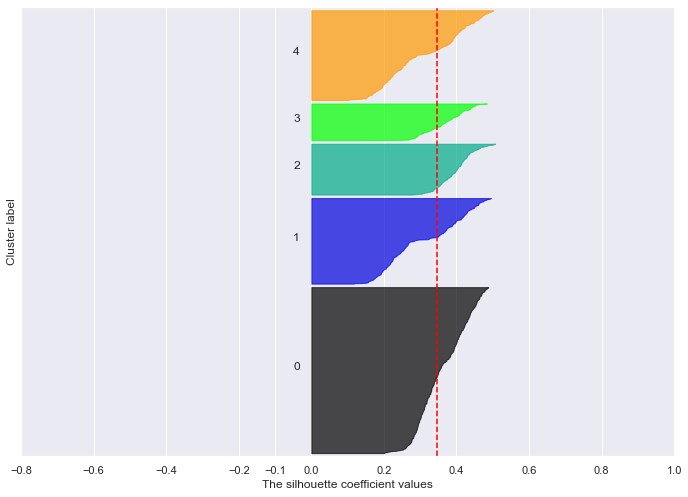

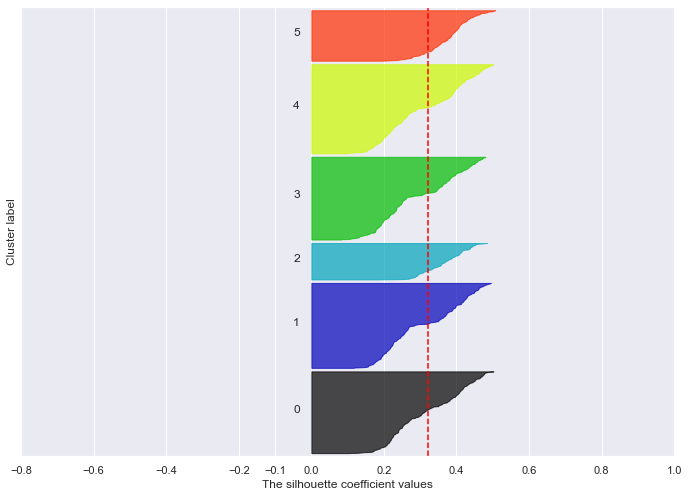

In [33]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]              
 
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df1) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df1)

    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x = silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.8, -0.6, -0.4, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

##### The highest average silhouete score is at the number of cluster = 4

### KMeans Clustering 

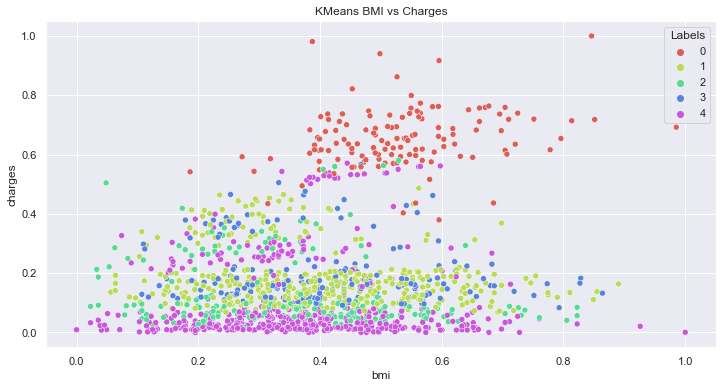

In [34]:
from sklearn.cluster import KMeans 
#Kmeans BMI vs Charges
X=df2.copy()
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 6))
sns.scatterplot(X['bmi'], X['charges'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(km5.labels_).shape[0]))
plt.title('KMeans BMI vs Charges')
plt.show()

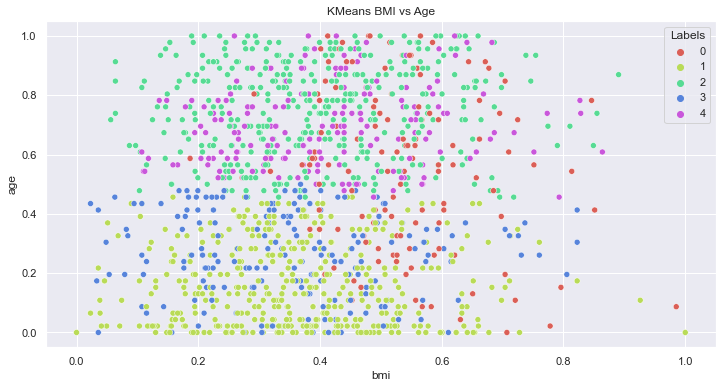

In [35]:
#kmeans age vs charges

km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 6))
sns.scatterplot(X['bmi'], X['age'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(km5.labels_).shape[0]))
plt.title('KMeans BMI vs Age')
plt.show()

### DBSCAN Clustering

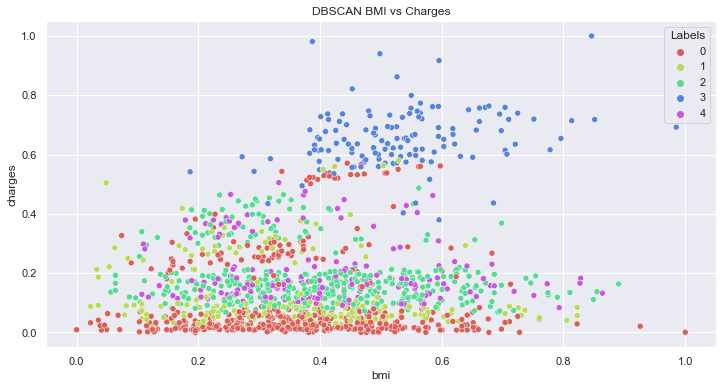

In [36]:
from sklearn.cluster import DBSCAN 


db = DBSCAN().fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 6))
sns.scatterplot(X['bmi'], X['charges'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN BMI vs Charges')
plt.show()

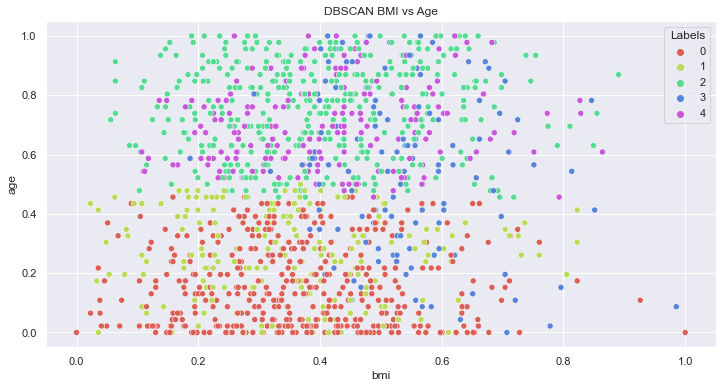

In [37]:
db = DBSCAN().fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 6))
sns.scatterplot(X['bmi'], X['age'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN BMI vs Age')
plt.show()

### Agglomerative Clustering

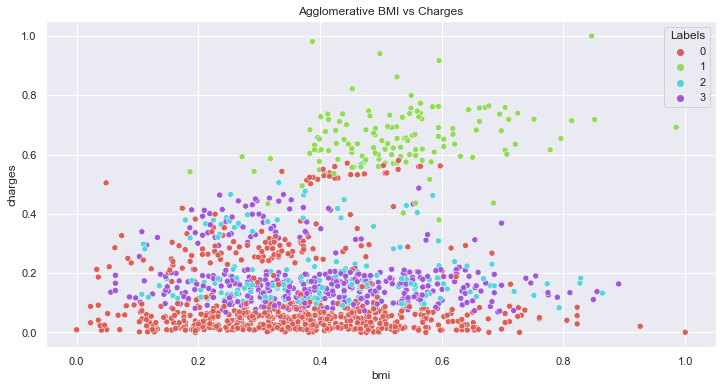

In [38]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 6))
sns.scatterplot(X['bmi'], X['charges'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(agglom.labels_).shape[0]))
plt.title('Agglomerative BMI vs Charges')
plt.show()

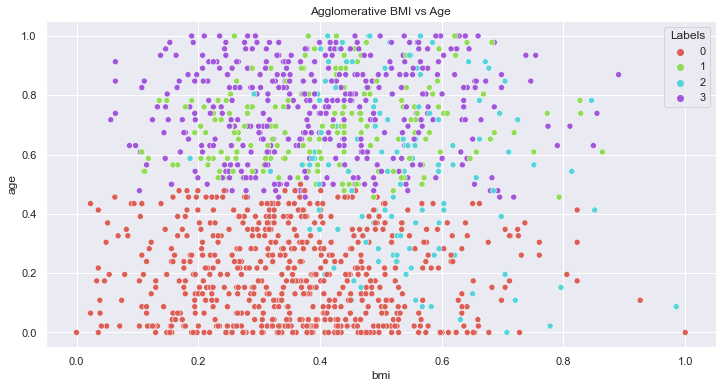

In [39]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 6))
sns.scatterplot(X['bmi'], X['age'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(agglom.labels_).shape[0]))
plt.title('Agglomerative BMI vs Age')
plt.show()

#### We performed above algorithms and we can say that outliers are difficult to identify, dbscan also has no exception .
#### Both clustering methods (k-means and agglomerative) are giving near results when compared among bmi vs charges among all the methods. bmi vs age does not create a good cluster.
#### K-means  is better clustering method here.

## TASK - 4 

In [40]:
df_numeric = df.select_dtypes('number')
df_numeric.head()

age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520

In [41]:
X = df1[['age','bmi','children']].values
y = df1['charges'].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

#### Linear regression using only numerical features

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
pred = lr.predict(X_test)

In [46]:
score_lr = lr.score(X_train,y_train)
print(score_lr)

0.10637459243908487


In [47]:
lr.coef_

array([0.17381471, 0.14170568, 0.04023842])

In [48]:
lr.intercept_

0.04592494449375065

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print("R^2 Score :",metrics.r2_score(y_test, pred))
print("Mean Absolute Error :",mean_absolute_error(y_test,pred))
print("Mean Squared Error :",mean_squared_error(y_test,pred))
print("Mean Squared Root Error :",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R^2 Score : 0.1361211628475788
Mean Absolute Error : 0.1469697203982779
Mean Squared Error : 0.036103284990311055
Mean Squared Root Error : 0.1900086445146932


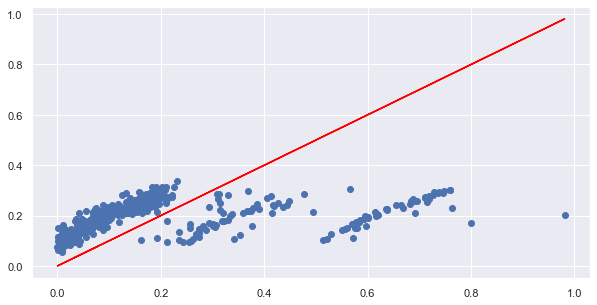

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='red')
plt.show()

#### Linear regression using numerical and categorical features

In [51]:
x1 = df1[['age','sex','bmi','children','smoker','region']].values
Y1 = df1['charges'].values

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x1, Y1, test_size=0.3, random_state=50)

In [53]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression() 

In [54]:
lr1.fit(x_train,Y_train)

LinearRegression()

In [55]:
pred1 = lr1.predict(x_test)

In [56]:
score_lr1 = lr1.score(x_train,Y_train)
print(score_lr1)

0.7305769685718237


In [57]:
lr1.coef_

array([ 0.18458747, -0.00509078,  0.17968305,  0.03234363,  0.36960329,
       -0.00768804])

In [58]:
lr1.intercept_

-0.041220731411214906

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print("R^2 Score :",metrics.r2_score(Y_test, pred1))
print("Mean Absolute Error :",mean_absolute_error(Y_test,pred1))
print("Mean Squared Error :",mean_squared_error(Y_test,pred1))
print("Mean Squared Root Error :",np.sqrt(metrics.mean_squared_error(Y_test,pred1)))

R^2 Score : 0.785429999801287
Mean Absolute Error : 0.06469379749614719
Mean Squared Error : 0.008967324507080644
Mean Squared Root Error : 0.09469595824046897


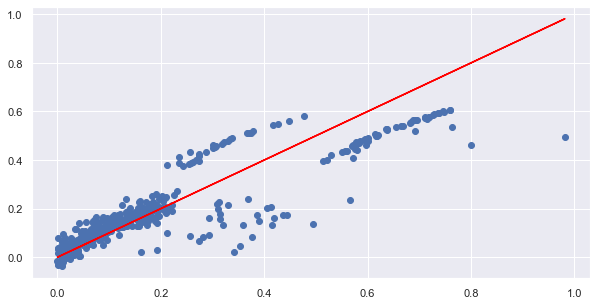

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(Y_test,pred1)
plt.plot(Y_test,Y_test,color='red')
plt.show()

As we can find here that we got improved result by using linear regression with numerical and categorical features.

# TASK - 5 

### Decision Tree for regression using numeric features

In [61]:
df_a = df.drop(['bmi_slots', 'sex', 'children'], axis = 1)
df_a.head()

age     bmi smoker     region      charges
0   19  27.900    yes  southwest  16884.92400
1   18  33.770     no  southeast   1725.55230
2   28  33.000     no  southeast   4449.46200
3   33  22.705     no  northwest  21984.47061
4   32  28.880     no  northwest   3866.85520

In [62]:
df_scale=df_a
minmax=MinMaxScaler()

scale_columns = ['age', 'bmi', 'smoker', 'region', 'charges']
df_scale[scale_columns] = minmax.fit_transform(df1[scale_columns])
df_scale.head()

age       bmi  smoker    region   charges
0  0.021739  0.321227     1.0  1.000000  0.251611
1  0.000000  0.479150     0.0  0.666667  0.009636
2  0.217391  0.458434     0.0  0.666667  0.053115
3  0.326087  0.181464     0.0  0.333333  0.333010
4  0.304348  0.347592     0.0  0.333333  0.043816

In [63]:
df_scaled = pd.DataFrame(df_scale)

In [64]:
X = df_scaled.iloc[:, 0:4]
y = df_scaled.iloc[:, -1]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)

In [66]:
reg = LinearRegression().fit(X, y)

pred = reg.predict(X_test)
print('The predicted values for test dependent: ', pred)

The predicted values for test dependent:  [ 0.55796384  0.07369827  0.07155241  0.40083837  0.19283173  0.09565309
  0.0816873   0.13540928  0.52218871  0.17313992  0.10539464  0.14644766
  0.55518218  0.17767467  0.02520338  0.55542451  0.18147545  0.12088154
  0.43202717  0.16390833  0.02029764  0.12329318  0.10322637  0.17020328
  0.51032892  0.59402756  0.2074296   0.05355944  0.16021442  0.2182855
  0.01687322  0.47155483  0.02470319  0.2178748   0.1845144   0.11539254
  0.01778106  0.09908991  0.00819394  0.11835669  0.07897472  0.51893189
  0.04205348  0.22444318  0.14955329  0.48549904  0.07443584  0.04390826
  0.0354314   0.07402494  0.14339554  0.18493055  0.17294605  0.01858543
  0.14945635  0.09744362  0.49985699  0.05097192  0.20497805  0.06283232
  0.22848787  0.17174341  0.15003459  0.12470445 -0.01197889  0.11865322
  0.14999881 -0.0032546   0.03352408  0.22455051  0.15297212  0.03498885
 -0.01756552  0.13506843  0.22770405 -0.02441931  0.18132964  0.14273493
  0.484023

In [67]:
reg_2 = LinearRegression().fit(X, y)

pred_2 = reg_2.predict(X_train)
print('The predicted values for train dependent: ', pred_2)

The predicted values for train dependent:  [ 2.44998076e-02  7.05262597e-02  1.47266786e-01  1.72521084e-01
  4.11774786e-01  1.31671520e-01  9.56840400e-02  1.67802260e-01
  7.35432215e-02  1.14321230e-01  4.24221103e-02  1.29004175e-01
  8.66155005e-02  5.48564301e-01  4.15122821e-01  7.90069110e-02
  2.93094977e-02  1.49211674e-01 -1.39028315e-02  2.33122456e-01
  3.82537080e-01 -7.36845103e-03  3.52280136e-02  5.54598225e-01
  1.55374597e-01  1.26389695e-01  5.91303380e-02  3.49229397e-02
  2.23908991e-01  1.46691379e-01  4.74375397e-02  6.25148469e-01
  3.28740142e-02  4.46015588e-01  6.31095035e-01  5.75354044e-01
  1.11865539e-01  6.05644934e-01  1.40956812e-01  5.42905126e-02
  6.07348180e-01  1.44735182e-01  1.24306844e-01  4.22577670e-01
  2.04621394e-01  1.58750683e-01  1.66477926e-01  7.42736782e-02
  1.19673648e-01  5.77981475e-01  1.29423347e-01  5.48082039e-02
  4.94938766e-01 -1.26645334e-05  1.71720381e-01  1.94965133e-02
  3.99378914e-01  6.18384780e-01  3.37768288e-0

In [68]:
print("RMSE for train data: ", np.sqrt(metrics.mean_squared_error(y_train, pred_2)))
print('R2 for train data: ', metrics.r2_score(y_train, pred_2))

print("RMSE for test data: ", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2 for test data: ', metrics.r2_score(y_test, pred))

RMSE for train data:  0.09822768608014805
R2 for train data:  0.7427518395667331
RMSE for test data:  0.0937849593040595
R2 for test data:  0.761803658166347


In [69]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth = 3,
                           min_samples_split = 5,
                           max_leaf_nodes = 15)

dtr.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtr.score(X_test,y_test)))

dtr.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(dtr.score(X_test,y_test)))

R-Squared on train dataset=0.8324239333627083
R-Squared on test dataset=0.8557614487147028


In [70]:
from sklearn import tree

fig, axes = plt.subplots(dpi = 1000)

tree.plot_tree(dtr,filled = True);

#save figure in current directory as png
fig.savefig('dec_tree.png')

In [71]:
df_num = df.select_dtypes('number')


In [72]:
model = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
model = model.fit(df_num)
print(model)
df_num['Labels'] = model.labels_

AgglomerativeClustering(linkage='average', n_clusters=3)


In [73]:

df_num.Labels.unique()

array([1, 0, 2], dtype=int64)

In [74]:
bins = [-1, 0, 1, 2]
slot = ['GOLD PACKAGE',
        'DIAMOND PACKAGE',
        'PLATINUM PACKAGE']

df_num['PACKAGE'] = pd.cut(df_num['Labels'], bins = bins, labels = slot)
df_num

age     bmi  children      charges  Labels          PACKAGE
0      19  27.900         0  16884.92400       1  DIAMOND PACKAGE
1      18  33.770         1   1725.55230       1  DIAMOND PACKAGE
2      28  33.000         3   4449.46200       1  DIAMOND PACKAGE
3      33  22.705         0  21984.47061       1  DIAMOND PACKAGE
4      32  28.880         0   3866.85520       1  DIAMOND PACKAGE
...   ...     ...       ...          ...     ...              ...
1333   50  30.970         3  10600.54830       1  DIAMOND PACKAGE
1334   18  31.920         0   2205.98080       1  DIAMOND PACKAGE
1335   18  36.850         0   1629.83350       1  DIAMOND PACKAGE
1336   21  25.800         0   2007.94500       1  DIAMOND PACKAGE
1337   61  29.070         0  29141.36030       0     GOLD PACKAGE

[1338 rows x 6 columns]

In [75]:
#file = df_num.to_csv('insurance_package.csv')

## Conclusion:

Based on our model we have come up with three types of insurance packages, that is Diamond, Gold and Platinum package.

So, based on this we can give Diamond package to 1108 customers, Gold package to 226 customers and Platinum package to 5 customers.


Type of package               No of customers eligible for relevent package based on model

Diamond package:              1108

Gold package:                  226

Platinum package:              5